In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

C:\Users\DELL\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
heart_df=pd.read_csv("F:/framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)
heart_df.isnull().sum()

Sex_male             0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

('Total number of rows with missing values is ', 489)
('since it is only', 0.0, 'percent of the entire dataset the rows with missing values are excluded.')


In [11]:
heart_df.dropna(axis=0,inplace=True)

In [12]:
heart_df['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

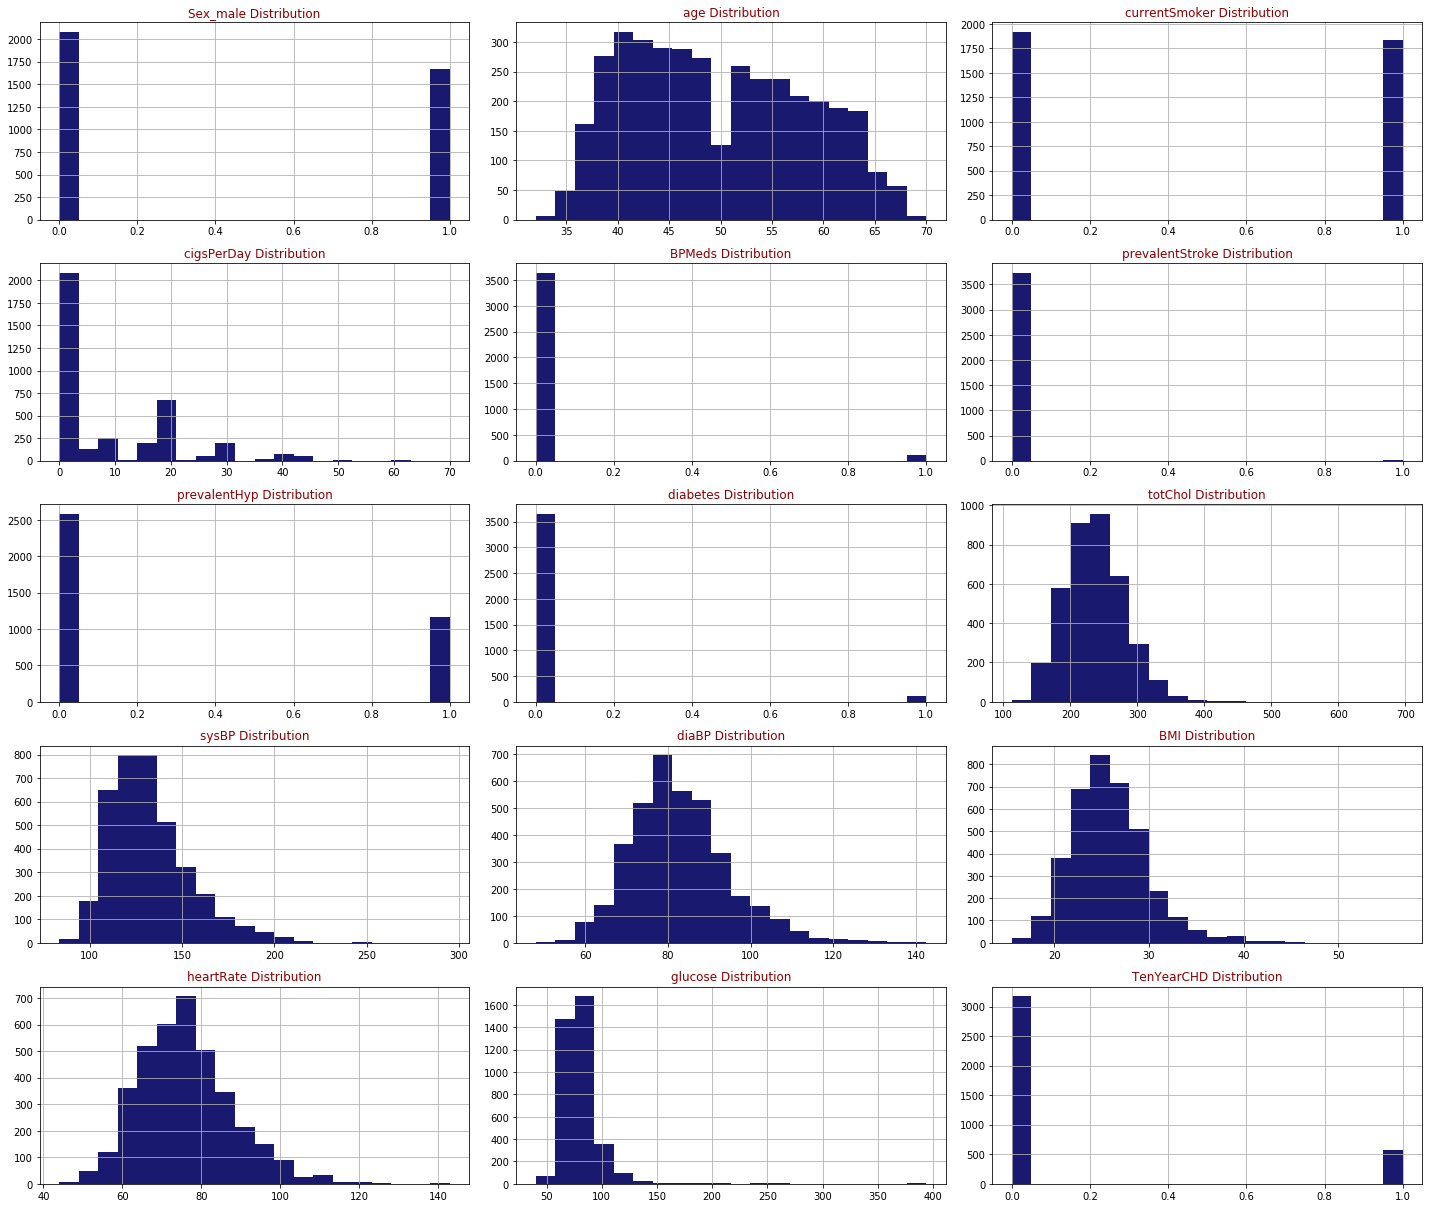

In [13]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [14]:
heart_df.TenYearCHD.value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

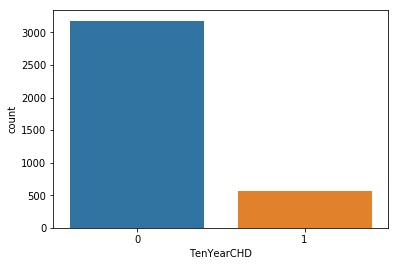

In [15]:
sn.countplot(x='TenYearCHD',data=heart_df)

In [16]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [17]:
#Logisict Regression
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [18]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.377036
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:                  0.1170
Time:                        13:05:18   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
                                        LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [19]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

#result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3736
Method:                           MLE   Df Model:                           14
Date:                Thu, 25 Apr 2019   Pseudo R-squ.:                  0.1170
Time:                        13:05:18   Log-Likelihood:                -1414.3
converged:                       True   LL-Null:                       -1601.7
                                        LLR p-value:                 2.439e-71
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6532      0.687    -12.589      0.000     -10.000      -7.306
Sex_male            0.5742      0.107      5.345      0.000       0.364       0.785
age                 0.0641      0.007      9.799      0.000       0.051       0.077
currentSmoker       0.0739      0.155      0.478      0.633      -0.229       0.377
cigsPerDay          0.0184      0.006      3.000      0.003       0.006       0.030
BPMeds              0.1448      0.232      0.623      0.533      -0.310       0.600
prevalentStroke     0.7193      0.489      1.471      0.141      -0.239       1.678
prevalentHyp        0.2142      0.136      1.571      0.116      -0.053       0.481
diabetes            0.0022      0.312      0.007      0.994      -0.610       0.614
totChol             0.0023      0.001      2.081      0.037       0.000       0.004
sysBP               0.0154      0.004      4.082      0.000       0.008       0.023
diaBP              -0.0040      0.006     -0.623      0.533      -0.016       0.009
BMI                 0.0103      0.013      0.827      0.408      -0.014       0.035
heartRate          -0.0023      0.004     -0.549      0.583      -0.010       0.006
glucose             0.0076      0.002      3.409      0.001       0.003       0.012
===================================================================================
"""

In [20]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
#pvalue=round(result.pvalues,3)
#conf['pvalue']=pvalue
#conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))


                        0         1        OR
const            0.000045  0.000672  0.000175
Sex_male         1.438535  2.191813  1.775669
age              1.052625  1.079972  1.066211
currentSmoker    0.795259  1.457747  1.076702
cigsPerDay       1.006384  1.030813  1.018526
BPMeds           0.733114  1.822247  1.155817
prevalentStroke  0.787320  5.353300  2.052988
prevalentHyp     0.948309  1.618428  1.238858
diabetes         0.543596  1.847705  1.002200
totChol          1.000131  1.004381  1.002254
sysBP            1.008012  1.022983  1.015470
diaBP            0.983708  1.008537  0.996045
BMI              0.985916  1.035488  1.010398
heartRate        0.989624  1.005885  0.997722
glucose          1.003227  1.012008  1.007608


In [21]:
# Splitting and train data
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

C:\Users\DELL\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.881491344873502

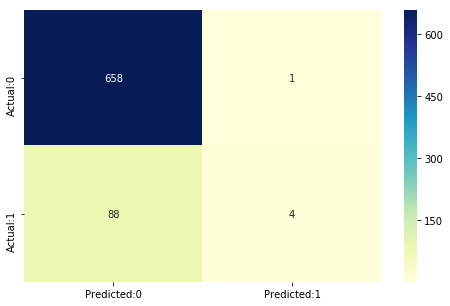

In [24]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [25]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [26]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ', 0.881491344873502, '\n', 'The Missclassification = 1-Accuracy = ', 0.118508655126498, '\n', 'Sensitivity or True Positive Rate = TP/(TP+FN) = ', 0.043478260869565216, '\n', 'Specificity or True Negative Rate = TN/(TN+FP) = ', 0.99848254931714719, '\n', 'Positive Predictive value = TP/(TP+FP) = ', 0.80000000000000004, '\n', 'Negative predictive Value = TN/(TN+FN) = ', 0.88203753351206438, '\n', 'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ', 28.652173913043509, '\n', 'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ', 0.95797541958504029)


In [27]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.859991,0.140009
1,0.930991,0.069009
2,0.792031,0.207969
3,0.814827,0.185173
4,0.875304,0.124696


In [28]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(x_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')
    

('With', 0, 'threshold the Confusion Matrix is ', '\n', array([[  0, 659],
       [  0,  92]], dtype=int64), '\n', 'with', 92, 'correct predictions and', 0, 'Type II errors( False Negatives)', '\n\n', 'Sensitivity: ', 1.0, 'Specificity: ', 0.0, '\n\n\n')
('With', 0, 'threshold the Confusion Matrix is ', '\n', array([[  0, 659],
       [  0,  92]], dtype=int64), '\n', 'with', 92, 'correct predictions and', 0, 'Type II errors( False Negatives)', '\n\n', 'Sensitivity: ', 1.0, 'Specificity: ', 0.0, '\n\n\n')
('With', 0, 'threshold the Confusion Matrix is ', '\n', array([[  0, 659],
       [  0,  92]], dtype=int64), '\n', 'with', 92, 'correct predictions and', 0, 'Type II errors( False Negatives)', '\n\n', 'Sensitivity: ', 1.0, 'Specificity: ', 0.0, '\n\n\n')
('With', 0, 'threshold the Confusion Matrix is ', '\n', array([[  0, 659],
       [  0,  92]], dtype=int64), '\n', 'with', 92, 'correct predictions and', 0, 'Type II errors( False Negatives)', '\n\n', 'Sensitivity: ', 1.0, 'Specificity

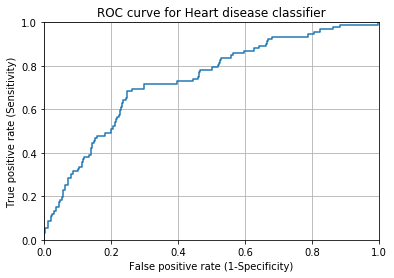

In [29]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [30]:
sklearn.metrics.roc_auc_score(y_test,y_pred_prob_yes[:,1])

0.73551824239625252

In [31]:
# SVM Algorithm

from sklearn.svm import SVC 

svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)


0.87749667110519303

In [32]:
# KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier  
knnclassifier = KNeighborsClassifier(n_neighbors=5) 
knnclassifier.fit(x_train,y_train)
y_pred=svc.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)


0.87749667110519303

In [33]:
#Naive Bayes 

# training the model on training set 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train) 
  
# making predictions on the testing set 
y_pred = gnb.predict(x_test) 
  
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn import metrics 
print(metrics.accuracy_score(y_test, y_pred))

0.856191744341


In [40]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [41]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.accuracy_score(y_test, y_pred))

0.758436944938


4-fold cross validation:



NameError: name 'model_selection' is not defined

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
#from sklearn.model_selection import train_test_split 

clf1=LogisticRegression(random_state=5)
clf2 =SVC()
clf3=KNeighborsClassifier(n_neighbors=5)
clf4=GaussianNB()
clf5=DecisionTreeClassifier(random_state=5)
print('5-fold cross validation:\n')
labels = ['Logistic Regression', 'SVM','KNN', 'Naive Bayes','Decision Tree']
for clf, label in zip([clf1, clf2, clf3,clf4,clf5], labels):
    scores = model_selection.cross_val_score(clf, x, y, cv=5,scoring='accuracy')
#scores=model_selection.cross_val_score(clf,
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"% (scores.mean(), scores.std(), label))


5-fold cross validation:



NameError: name 'model_selection' is not defined

In [ ]:

from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4,clf5], weights=[1,1,1,1,1])

labels = ['Logistic Regression', 'SVM','KNN', 'Naive Bayes','Decision Tree','Ensemble']
for clf, label in zip([clf1, clf2, clf3,clf4,clf5,eclf], labels):

    scores = model_selection.cross_val_score(clf, x, y,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
